In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
master = pd.read_csv("../logs/traceUsage/report.txt") #old code

In [3]:
source_dir = '../logs/traceUsage/nvml_trace_test/'
tests = ['test1','test2','test3']
sizes = ['64','128','256','512','1024']

raw = {}

for test in tests:
    temp = {}
    for sz in sizes:
        temp[sz] = pd.read_csv(f'{source_dir}{test}/size_{sz}_report.txt')
    raw[test] = temp

In [4]:
####################################################################################
#   description     : load all metrics from all the tests, average the values         
#   Args:
#       src         : Source dataframe containing all tests and variants
#                      df [ variant_# ] [ test_# ] 
#       tests       : specify a list of test folder names of type string.
#       variants    : img_size?
#       grpByVal    : the key/index. 
####################################################################################
def get_avg_of_all_tests(src, tests= raw.keys(), variants=sizes, grpByVal='code-section'):
    avg = {}
    for v in variants:
        avg[v] = pd.DataFrame()
        for test in tests:
            avg[v] = pd.concat([avg[v],src[test][v]])
        avg[v] = avg[v].groupby(grpByVal,as_index=False).mean()
    return avg

####################################################################################
#   description     : add suffix to all the columns of a dataframe         
#   Args:
#       df          : dataframe  
#       sfx         : suffix
####################################################################################
# 
def add_suffix(df,sfx, ignore):
    df.columns = df.columns.map(lambda x: str(x) if x == ignore else (str(x) + sfx))

def remove_suffix(df, sfx, ignore=None):
    df.columns = df.columns.map(lambda x: str(x) if x == ignore else (str(x).rstrip(sfx)))


####################################################################################
#   description     : Extract a single metric from all the variants for plotting
#   Args:
#       src         : Source dataframe containing all tests and variants
#                      df [ variant_# ] 
#       x           : key/index value that forms the X-axis in the plot.
#       y           : metric to view/compare against other variants
#       variants    : img_size?
####################################################################################
def get_single_metric_all_variants(src=None, x='time',  y=None, variants=sizes):
    data = src[variants[0]][[x]]
    for v in variants:
        add_suffix(src[v], str('_'+v), ignore=x)
        data = pd.concat([data, src[v][[str(y+'_'+v)]]], axis=1)
        remove_suffix(src[v], str('_'+v), ignore=x)

    return data

In [7]:
def getMetric_single_test_all_variants(src=None, metric=None, variants = sizes, x='time'):
    mt = {}
    for v in variants:
        if x is None:
            mt[v] = src[v][[metric]]
        else:
            mt[v] = src[v][[x,metric]]
    return mt

In [10]:
metric = 'power-usage'
src = raw['test1']
foo = getMetric_single_test_all_variants(src=src, metric=metric, variants=sizes, x='time')

ax = pow.plot(x='time', label='64')
#foo['128'].plot(ax=ax,x='time', label='128')
#foo['256'].plot(ax=ax,x='time')
#foo['512'].plot(ax=ax,x='time')
#foo['1024'].plot(ax=ax,x='time')

KeyError: 'time'

<AxesSubplot: xlabel='time'>

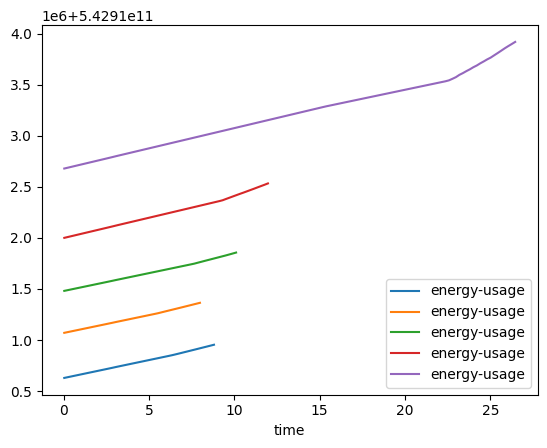

In [99]:
metric = 'energy-usage'
src = raw['test1']
foo = getMetric_single_test_all_variants(src=src, metric=metric, variants=sizes, x='time')

ax = foo['64'].plot(x='64')
foo['128'].plot(ax=ax,x='time')
foo['256'].plot(ax=ax,x='time')
foo['512'].plot(ax=ax,x='time')
foo['1024'].plot(ax=ax,x='time')

<AxesSubplot: xlabel='time'>

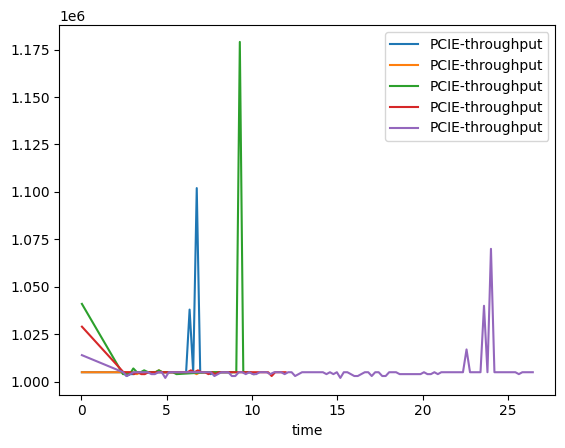

In [113]:
metric = 'PCIE-throughput'
src = raw['test1']
foo = getMetric_single_test_all_variants(src=src, metric=metric, variants=sizes, x='time')

ax = foo['64'].plot(x='time')
foo['128'].plot(ax=ax,x='time')
foo['256'].plot(ax=ax,x='time')
foo['512'].plot(ax=ax,x='time')
foo['1024'].plot(ax=ax,x='time')

<AxesSubplot: xlabel='time'>

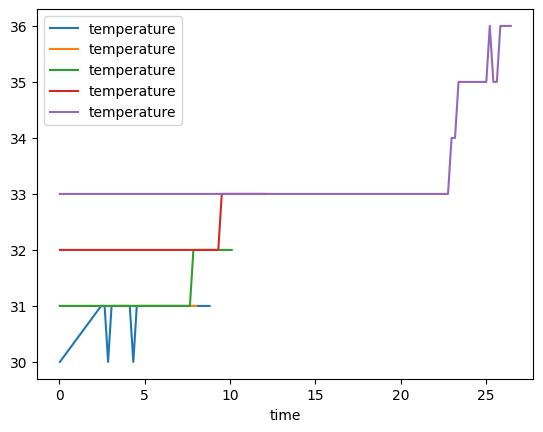

In [110]:
metric = 'temperature'
src = raw['test1']
foo = getMetric_single_test_all_variants(src=src, metric=metric, variants=sizes, x='time')

ax = foo['64'].plot(x='time')
foo['128'].plot(ax=ax,x='time')
foo['256'].plot(ax=ax,x='time')
foo['512'].plot(ax=ax,x='time')
foo['1024'].plot(ax=ax,x='time')

In [ ]:
ranges = []
colors = "bgrcmykw"
c_i=0
for cs in master['code-section'].unique():
    c_i=c_i+1
    ranges.append([cs,master['time'].loc[master['code-section'] == cs].min(),master['time'].loc[master['code-section'] == cs].max(),colors[c_i]])

In [5]:
gpu_util = master[['time','gpu-utilization']]
mem_util = master[['time','memory-utilization']]

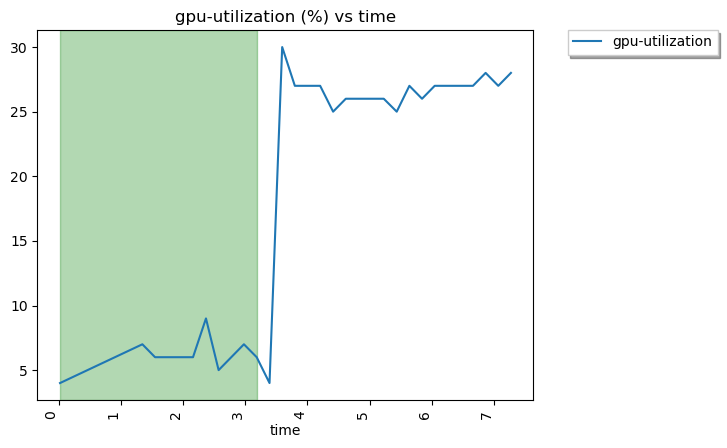

In [6]:
ax = gpu_util.plot(markevery=gpu_util[['gpu-utilization']],x='time', title='gpu-utilization (%) vs time')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right');
ax.legend(loc='upper center', bbox_to_anchor=(1.22, 1.02), ncol=1, fancybox=False, shadow=True)
ax.axvspan(ranges[0][1], ranges[0][2], color=ranges[0][3], alpha=0.3)

fig = ax.get_figure()
fig.savefig('figures/gpu_util_trace.jpg',bbox_inches='tight')
fig = ax.get_figure()

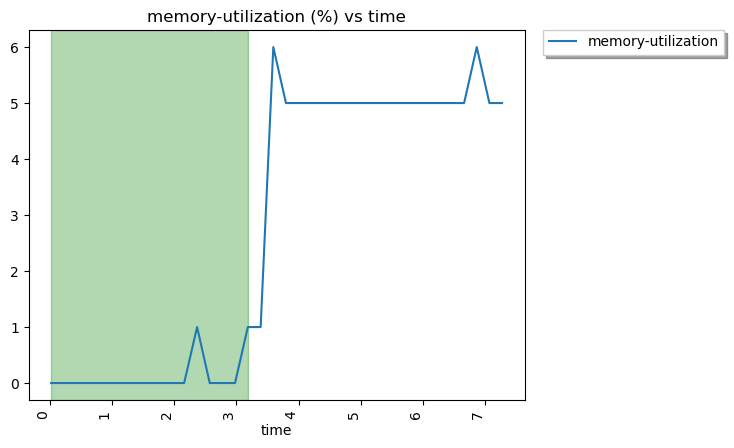

In [8]:
ax2 = mem_util.plot(x='time', title='memory-utilization (%) vs time')
plt.setp(ax2.get_xticklabels(), rotation=90, horizontalalignment='right');
ax2.legend(loc='upper center', bbox_to_anchor=(1.22, 1.02), ncol=1, fancybox=False, shadow=True)
ax2.axvspan(ranges[0][1], ranges[0][2], color=ranges[0][3], alpha=0.3)

fig = ax2.get_figure()
fig.savefig('figures/mem_util_trace.jpg',bbox_inches='tight')
fig = ax2.get_figure()